### Adaptive Linear Neurons  (Batch vs Stochastic GDs)

> (B. Widrow et al Adaptive "Adaline" neuron using chemical "memisters". Number Technical Report 1553-2. Standford Electron. Labs. Standford, CA, October 1960).


- Adaptive Linear Neuron **(Adaline)** - Single-layer neural network
- Also known as the _Widrow-Hoff_ rule
- Learning rates are updated based on a **linear ativation function** rather than a unit step function (e.g perceptron)



In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Used for plot_decision_regions
from matplotlib.colors import ListedColormap

#%matplotlib notebook
%matplotlib inline

plt.rcParams['figure.figsize'] = (6, 5)

In [4]:
df = pd.read_csv("../data/irisdata-perceptron.csv", header=None)

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

In [6]:
class AdalineGD(object):
    '''
    ADAptive LInear NEuron classifier
    
    Parameters
    ----------
    eta: float - Learning rate (between 0.0 and 1.0)
    n_iter: int - Passes over the training dataset
    
    Attributes
    ----------
    w_: 1d-array - Weights after fitting.
    errors_: list - Numbers of misclassifications in every epoch
    
    '''
    
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """ 
        Fit training data
        
        Parameters
        ---------
        X: {array ike}, shape = [n_samples, n_features] 
           Training vectors, where n_samples is th enumber of samples and n_features is the number of features
           
        y: {array like}, shape = [n_samples] - Target values
        
        Returns
        ---------
        self: object
        
        """

        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """ Calculate net input """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """ Compute linear activation """
        return self.net_input(X)
    
    def predict(self, X):
        """ Return class lasbel after unit step """
        return np.where(self.activation(X) >= 0.0, 1, -1)

The learning rate, ```n```, as well as the number of epochs, ```n_iter```, are hyperparameters of the perceptron and Adaline learning algorithms. 

1. When the learning rate is large, (0.01), you can see you risk the chance of the error rate becoming larger  
2. When the learning rate is too small, (0.0001), you can see it takes a long time to converge to a minimum

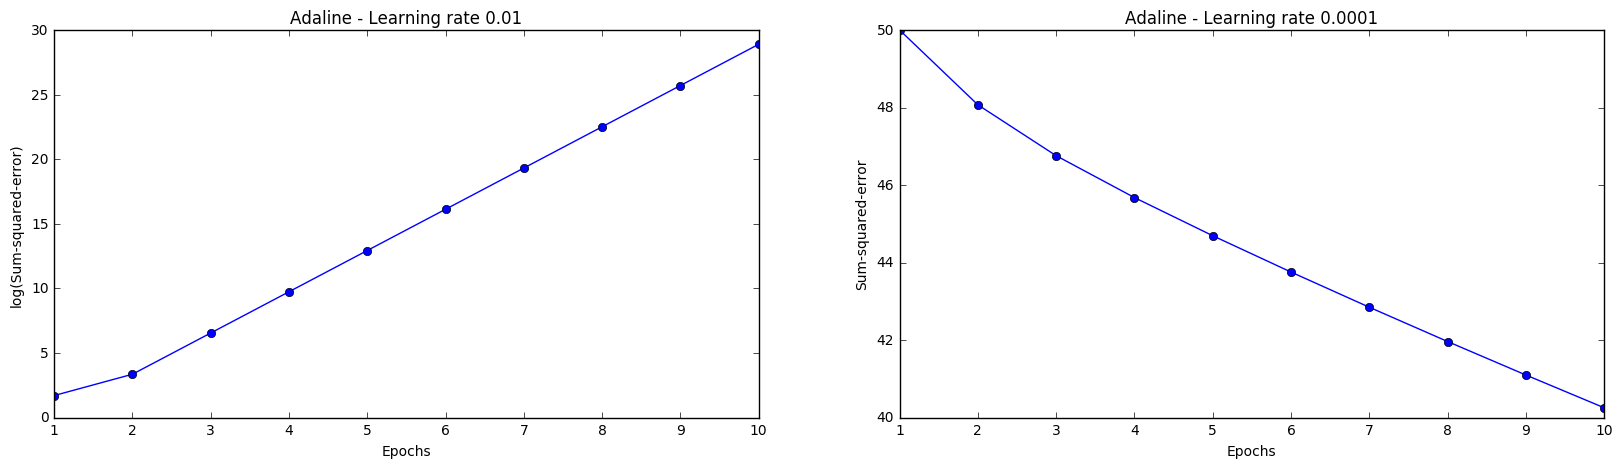

In [59]:
# Non normalized features

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

# Creating an Adaline Obj, ada1 using a very large learning rate
ada1 = AdalineGD(n_iter=10, eta=0.01)
ada1.fit(X, y)

# Plotting
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

# Creating an Adaline Obj, ada2 using a very small learning rate
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X,y)

# Plotting
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
                 
plt.show()

Here we use standardization, which gives our data the property of a standard normal distribution.

In [17]:
X_std = np.copy(X)

X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [21]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

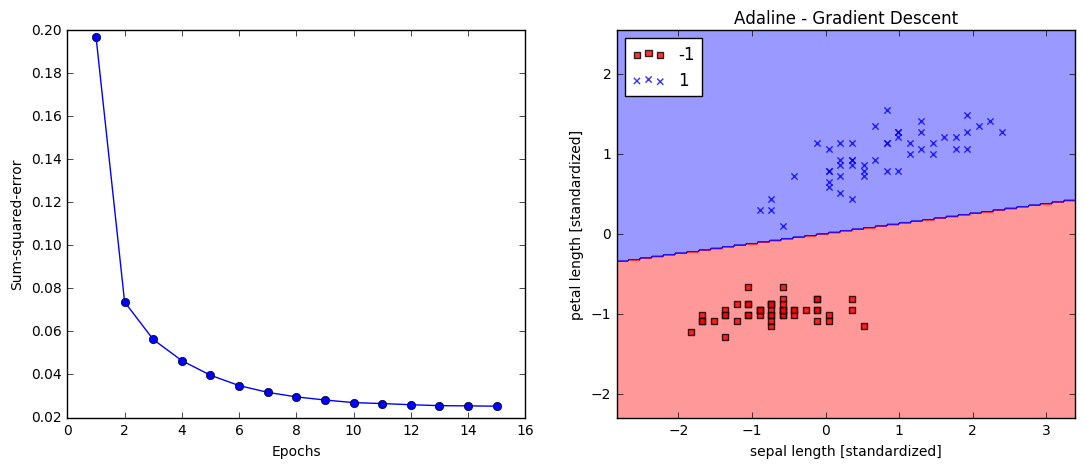

In [65]:
# Train the new standardized dataset
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')


ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o' )
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum-squared-error')

#### Large scale machine learning and stochastic gradient descent (SGD)

- The above implementation demonstrates how to minimize a cost function using 'batch' gradient descent.
- Running this type of 'batch' implementation can be computationally expensive on a very large dataset
- A popular alternative to the batch gradient descent algorithim is **stochastic gradient descent**, sometimes called **iterative** or **in-line gradient descent**.
    - An alternative from updating weights based on the sum of the accumulated errors over all samples.
    - Here we update the wegiths **incrementally for each** training sample.

---

###### Advantages
- Reaches convergence much faster because of the more frequent weight updates.
- Stochastic gradient descent can escape shallow local minima more readily.
- Online Learning ; Training the model on-the-fly as new data arrives  

> Remember: It is important to present it with data in random order (Shuffle the training set for every epoch)

In [61]:
from numpy.random import seed

class AdalineSGD(object):
    '''
    ADAptive LInear NEuron classifier
    
    Parameters
    ----------
    eta: float - Learning rate (between 0.0 and 1.0)
    n_iter: int - Passes over the training dataset
    
    Attributes
    ----------
    w_: 1d-array - Weights after fitting.
    errors_: list - Numbers of misclassifications in every epoch
    shuffle : bool (default: True) - Shuffls training data 
    random_state : int (default:None) - Set random state for shuffling and intializing the weights
    
    '''
    
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        
        if random_state:
            seed(random_state)
        
    def fit(self, X, y):
        """ 
        Fit training data
        
        Parameters
        ---------
        X: {array ike}, shape = [n_samples, n_features] 
           Training vectors, where n_samples is th enumber of samples and n_features is the number of features
           
        y: {array like}, shape = [n_samples] - Target values
        
        Returns
        ---------
        self: object
        
        """

        self._initialize_weights(X.shape[1])
        self.cost_ = []


        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
            
        return self

    def partial_fit(self, X, y):
        """ Fit training data without reinitializing the weights """
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """ Shuffle training data """
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """ Initialize weights to zeros """
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """ Apply Adaline learning rule to update the weights """
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """ Calculate net input """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """ Compute linear activation """
        return self.net_input(X)
    
    def predict(self, X):
        """ Return class lasbel after unit step """
        return np.where(self.activation(X) >= 0.0, 1, -1)

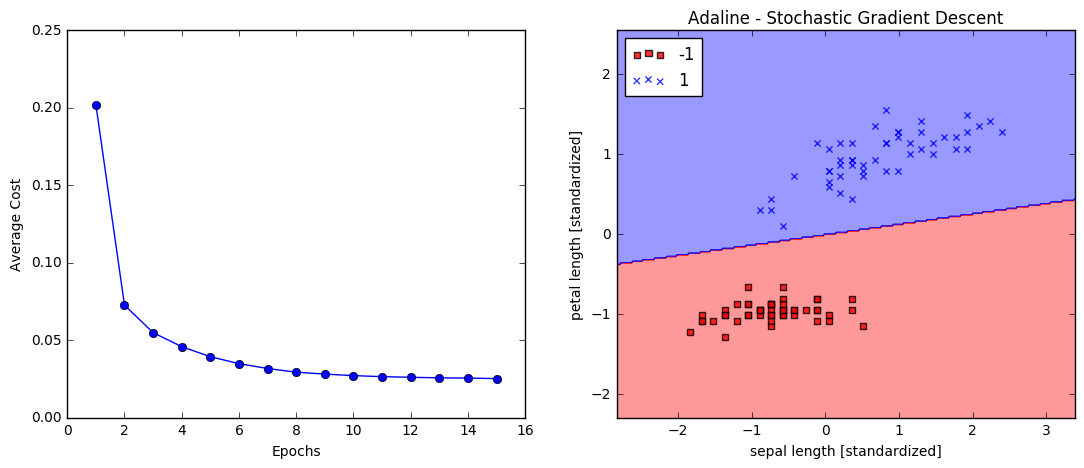

In [64]:
# Train using the SGD implementation and plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Average Cost')

Using the SGD, you can see the average cost goes down pretty quick (Left figure), and the final decision boundary (Right figure) after 15 epochs looks similiar to the batch gradient descent above. 

If we want to update our model, (e.g on-line learning scenario with streaming data), we can simply call the ```partial_fit``` method, (e.g: ```ada.partial_fit(X_std[0, :1], y[0])```

In [69]:
# System Information
%load_ext version_information
%version_information numpy, scipy, matplotlib, pandas

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.5.1 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 5.1.0
OS Darwin 15.6.0 x86_64 i386 64bit
numpy 1.11.1
scipy 0.18.0
matplotlib 1.5.3
pandas 0.18.1
Thu Sep 22 19:58:56 2016 PDT